<a href="https://colab.research.google.com/github/AbR04/6thSem-ML-Lab/blob/main/1BM22CS005_Lab_9_adaboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
df = pd.read_csv("income.csv")

# Clean whitespace from column names
df.columns = df.columns.str.strip()

# Encode the target column 'income_level' if it's categorical
if df['income_level'].dtype == 'object':
    le = LabelEncoder()
    df['income_level'] = le.fit_transform(df['income_level'])

# Features and target
X = df.drop('income_level', axis=1)
y = df['income_level']

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train AdaBoost classifier
model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.8328
Confusion Matrix:
[[7117  297]
 [1336 1019]]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load Iris dataset for example
data = load_iris()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameters to tune
n_estimators_list = [10, 50, 100]
learning_rates = [0.1, 0.5, 1.0]

# AdaBoost with DecisionTreeClassifier base estimator
print("\nAdaBoost with DecisionTreeClassifier base estimator:")
for n in n_estimators_list:
    for lr in learning_rates:
        base_dt = DecisionTreeClassifier(max_depth=1)  # Decision stump
        ada_dt = AdaBoostClassifier(estimator=base_dt, n_estimators=n, learning_rate=lr, random_state=42)
        ada_dt.fit(X_train, y_train)
        y_pred = ada_dt.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f"  n_estimators={n}, learning_rate={lr:.1f} => Accuracy: {acc:.4f}")

# AdaBoost with LogisticRegression base estimator
print("\nAdaBoost with LogisticRegression base estimator:")
for n in n_estimators_list:
    for lr in learning_rates:
        base_lr = LogisticRegression(max_iter=1000)
        ada_lr = AdaBoostClassifier(estimator=base_lr, n_estimators=n, learning_rate=lr, random_state=42)
        ada_lr.fit(X_train, y_train)
        y_pred = ada_lr.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f"  n_estimators={n}, learning_rate={lr:.1f} => Accuracy: {acc:.4f}")

# GradientBoostingClassifier as an alternative to AdaBoost
print("\nGradient Boosting with Logistic Regression-like behavior:")
for n in n_estimators_list:
    for lr in learning_rates:
        gb = GradientBoostingClassifier(n_estimators=n, learning_rate=lr, random_state=42)
        gb.fit(X_train, y_train)
        y_pred = gb.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f"  n_estimators={n}, learning_rate={lr:.1f} => Accuracy: {acc:.4f}")


AdaBoost with DecisionTreeClassifier base estimator:
  n_estimators=10, learning_rate=0.1 => Accuracy: 0.9667
  n_estimators=10, learning_rate=0.5 => Accuracy: 1.0000
  n_estimators=10, learning_rate=1.0 => Accuracy: 1.0000
  n_estimators=50, learning_rate=0.1 => Accuracy: 1.0000
  n_estimators=50, learning_rate=0.5 => Accuracy: 0.9667
  n_estimators=50, learning_rate=1.0 => Accuracy: 0.9333
  n_estimators=100, learning_rate=0.1 => Accuracy: 1.0000
  n_estimators=100, learning_rate=0.5 => Accuracy: 1.0000
  n_estimators=100, learning_rate=1.0 => Accuracy: 0.9333

AdaBoost with LogisticRegression base estimator:
  n_estimators=10, learning_rate=0.1 => Accuracy: 1.0000
  n_estimators=10, learning_rate=0.5 => Accuracy: 0.9667
  n_estimators=10, learning_rate=1.0 => Accuracy: 0.9333
  n_estimators=50, learning_rate=0.1 => Accuracy: 1.0000
  n_estimators=50, learning_rate=0.5 => Accuracy: 1.0000
  n_estimators=50, learning_rate=1.0 => Accuracy: 0.9333
  n_estimators=100, learning_rate=0.1 

Dataset Loaded: Iris
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Classes: ['setosa' 'versicolor' 'virginica']

Data Split: Training size=105, Testing size=45

--- AdaBoost with Default Base Estimator (Decision Tree) ---
Default AdaBoost Accuracy (n_estimators=50, lr=1.0): 1.0000

--- Fine-tuning: Varying n_estimators ---
AdaBoost Accuracy (n_estimators=10): 1.0000
AdaBoost Accuracy (n_estimators=50): 1.0000
AdaBoost Accuracy (n_estimators=100): 1.0000
AdaBoost Accuracy (n_estimators=200): 1.0000
AdaBoost Accuracy (n_estimators=300): 1.0000

Best accuracy (1.0000) achieved with n_estimators = 10

--- Fine-tuning: Varying learning_rate ---
AdaBoost Accuracy (learning_rate=0.01, n_estimators=10): 0.7111
AdaBoost Accuracy (learning_rate=0.1, n_estimators=10): 0.9778
AdaBoost Accuracy (learning_rate=0.5, n_estimators=10): 1.0000
AdaBoost Accuracy (learning_rate=1.0, n_estimators=10): 1.0000
AdaBoost Accuracy (learning_rate=1.5, n_estim

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


AdaBoost with Logistic Regression Accuracy: 0.8000

--- Accuracy Summary ---
Default AdaBoost (Decision Tree): 1.0000
Tuned AdaBoost (Decision Tree, n_estimators=10, lr=0.5): 1.0000
AdaBoost with Logistic Regression (n_estimators=10, lr=0.5): 0.8000


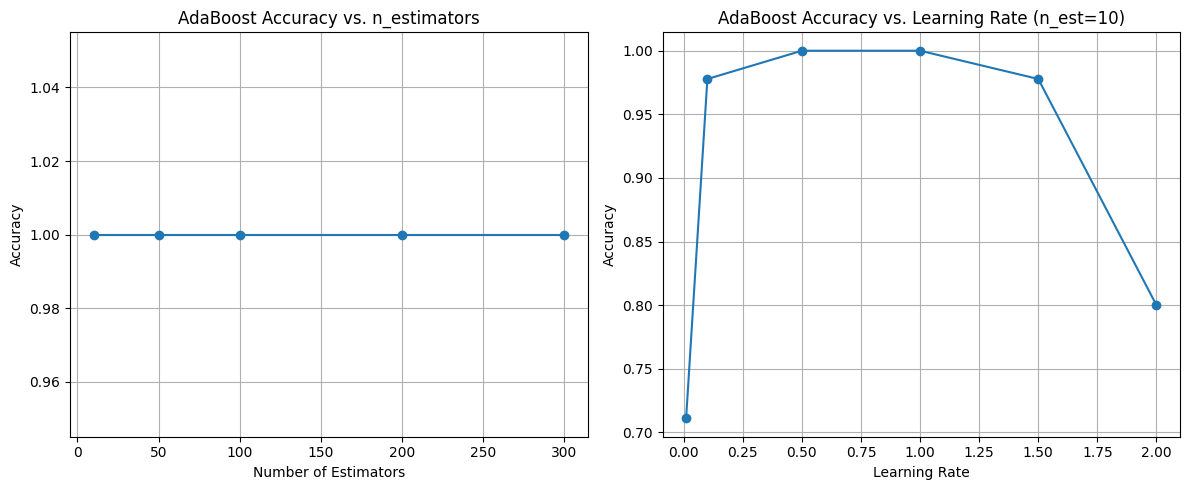

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print("Dataset Loaded: Iris")
print(f"Features: {feature_names}")
print(f"Target Classes: {target_names}\n")

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Data Split: Training size={len(X_train)}, Testing size={len(X_test)}\n")

# --- AdaBoost with Default Base Estimator (Decision Tree) ---
print("--- AdaBoost with Default Base Estimator (Decision Tree) ---")

# 3. Train a default AdaBoost classifier
# Default base_estimator is DecisionTreeClassifier(max_depth=1)
# Default n_estimators=50, learning_rate=1.0
abc_default = AdaBoostClassifier(random_state=42)
abc_default.fit(X_train, y_train)
y_pred_default = abc_default.predict(X_test)
accuracy_default = accuracy_score(y_test, y_pred_default)
print(f"Default AdaBoost Accuracy (n_estimators=50, lr=1.0): {accuracy_default:.4f}\n")


# --- Fine-tuning: Varying n_estimators ---
print("--- Fine-tuning: Varying n_estimators ---")
estimators_range = [10, 50, 100, 200, 300]
accuracies_estimators = []

for n_est in estimators_range:
    abc = AdaBoostClassifier(n_estimators=n_est, random_state=42)
    abc.fit(X_train, y_train)
    y_pred = abc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_estimators.append(accuracy)
    print(f"AdaBoost Accuracy (n_estimators={n_est}): {accuracy:.4f}")

# Find the best n_estimators value
best_n_estimators = estimators_range[np.argmax(accuracies_estimators)]
best_accuracy_estimators = max(accuracies_estimators)
print(f"\nBest accuracy ({best_accuracy_estimators:.4f}) achieved with n_estimators = {best_n_estimators}\n")


# --- Fine-tuning: Varying learning_rate ---
print("--- Fine-tuning: Varying learning_rate ---")
learning_rate_range = [0.01, 0.1, 0.5, 1.0, 1.5, 2.0]
accuracies_lr = []

# Use the best n_estimators found previously or a reasonable default like 100
n_estimators_for_lr_tuning = best_n_estimators # Or you could fix it, e.g., 100

for lr in learning_rate_range:
    # Ensure learning_rate is positive
    if lr <= 0:
        print(f"Skipping invalid learning_rate: {lr}")
        continue
    abc = AdaBoostClassifier(n_estimators=n_estimators_for_lr_tuning, learning_rate=lr, random_state=42)
    abc.fit(X_train, y_train)
    y_pred = abc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_lr.append(accuracy)
    print(f"AdaBoost Accuracy (learning_rate={lr}, n_estimators={n_estimators_for_lr_tuning}): {accuracy:.4f}")

# Find the best learning_rate value
best_learning_rate = learning_rate_range[np.argmax(accuracies_lr)]
best_accuracy_lr = max(accuracies_lr)
print(f"\nBest accuracy ({best_accuracy_lr:.4f}) achieved with learning_rate = {best_learning_rate} (using n_estimators={n_estimators_for_lr_tuning})\n")


# --- AdaBoost with Logistic Regression as Base Estimator ---
print("--- AdaBoost with Logistic Regression Base Estimator ---")

# Create a Logistic Regression model (can be tuned if needed)
# Note: AdaBoost requires the base estimator to support sample weighting.
# LogisticRegression supports this. For multi-class, it might use OvR internally.
# AdaBoost with Logistic Regression might require more estimators or different tuning.
log_reg = LogisticRegression(solver='liblinear', random_state=42) # liblinear is often good for smaller datasets

# Create AdaBoost with Logistic Regression
# Use parameters found from tuning or defaults
abc_logreg = AdaBoostClassifier(
    estimator=log_reg,
    n_estimators=best_n_estimators, # Use best n_estimators found
    learning_rate=best_learning_rate, # Use best learning_rate found
    random_state=42,
    algorithm='SAMME' # SAMME needed for discrete multi-class outputs like Logistic Regression
)

# Train and predict
abc_logreg.fit(X_train, y_train)
y_pred_logreg = abc_logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"AdaBoost with Logistic Regression Accuracy: {accuracy_logreg:.4f}\n")


# --- Summary ---
print("--- Accuracy Summary ---")
print(f"Default AdaBoost (Decision Tree): {accuracy_default:.4f}")
print(f"Tuned AdaBoost (Decision Tree, n_estimators={best_n_estimators}, lr={best_learning_rate}): {max(best_accuracy_estimators, best_accuracy_lr):.4f}") # Show the best overall tuned accuracy
print(f"AdaBoost with Logistic Regression (n_estimators={best_n_estimators}, lr={best_learning_rate}): {accuracy_logreg:.4f}")

# Optional: Plotting results (requires matplotlib)
try:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(estimators_range, accuracies_estimators, marker='o')
    plt.title('AdaBoost Accuracy vs. n_estimators')
    plt.xlabel('Number of Estimators')
    plt.ylabel('Accuracy')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(learning_rate_range, accuracies_lr, marker='o')
    plt.title(f'AdaBoost Accuracy vs. Learning Rate (n_est={n_estimators_for_lr_tuning})')
    plt.xlabel('Learning Rate')
    plt.ylabel('Accuracy')
    plt.grid(True)

    plt.tight_layout()
    plt.show()
except NameError:
    print("\nMatplotlib not installed. Skipping plots.")
except Exception as e:
    print(f"\nCould not generate plots: {e}")
